# Survival Game - <font size=4 color='gray'>Alexander Bruun, Anton Paris </font>
# <font color='gray'>Code for the simulation </font>
Based on Leonel Aguilar's 2D Cellular Automata


___

### Import Libraries

In [542]:
import numpy as np #matrix and vector library
import matplotlib.pyplot as plt #plotting library
from random import shuffle
import random 



### Define plots to be inlined

In [543]:
#Jupyter magic that makes plots to be inlined in the notebook
%matplotlib inline 

### Create object Cell

In [544]:
#TO DO 
    #__init__ calls function, based on cell type  for initialicing?

In [545]:
##Add attributes here 


class Cell():
    def __init__(self, type_cell, lifespan, nutrition_level ):
        self.type_cell = type_cell
        self.lifespan = lifespan 
        self.nutrition_level= nutrition_level
        
        
    def increase_l (self, value):
        self.lifespan+= value      
        
    def death (self):
        self.lifespan=0
        self.type_cell=0 #forest
                 
    def eat (self, value):
        self.nutrition_level+= value
        
    def get_type (self):
        return self.type_cell
    
    
    
        
    def set_movement(self, cells, coords_1, coords_2, increase_value_lifespan, increase_value_eat):
        
        #consuming resosursses 
        cells[coords_2[1],coords_[2]].increase_l(increase_value_lifespan)
        cells[coords_2[1],coords_[2]].eat(increase_value_eat)
        ##needs more attributes
        
        cells[coords_2[1],coords_[2]]=cells[coords_1[0]],[coords_1[1]]
        cells[coords_2[1],coords_[2]].death()
        
        
        
        
        
   
        
        
   

        

        

In [552]:
def  get_value_eat(states,coords):
    if states[coords[0],coords[1]] >=0:
        return 3

###  Build 2D List 

In [553]:
#empty grid
#POST: array created with [rows][colums]
def initGrid(cols,rows,array):
    
    for i in range (rows):
        array.append([1])
        
        for j in range (cols):
            array[i].append(0)
      
            
              

### Fill grid randoly with desired range 

In [554]:
# TO DO 
#specific attribute adding mechanism 
#OVERVIEW attributes 

In [555]:
#0 forest, 1 wolves
#POST: fills Grid with random numbers and the right attributes 
def fillGrid(rows,cols,array):
    
    for i in range (rows):
        for j in range (cols):
                  array[i][j]= Cell(random.randint(0,2),0,100) #atrribute 

##### forest= 0, wolves = 1, rabbits = 2 


In [556]:
# TO DO 
    # RULES SET 
    #... 

In [557]:
global r_dim, c_dim, cells #Dimension of the 1D cells space
r_dim= 10 
c_dim= 10 
 #creating empty cells
cells=[]


In [558]:
initGrid(r_dim, c_dim, cells)
fillGrid(r_dim, c_dim, cells)


In [559]:
cells[1][2].type_cell

0

In [560]:
#create a new updated matrix with only the cell types  
#Post: returns 2D array[row][columns] with the current states of the cells, 
def update_grid(r_dim,c_dim,cells):
    type_cell_array=np.zeros((r_dim,c_dim))
    for i in range(r_dim):
        for j in range(c_dim):
          type_cell_array[i][j]= cells[i][j].type_cell
            
    return type_cell_array

In [561]:
cells_m_type=update_grid(r_dim, c_dim, cells)

In [562]:
cells_m_type

array([[1., 1., 0., 0., 1., 1., 2., 2., 0., 1.],
       [0., 1., 0., 1., 1., 0., 2., 2., 1., 0.],
       [1., 1., 2., 2., 1., 0., 2., 1., 2., 1.],
       [2., 2., 1., 0., 0., 0., 1., 0., 2., 2.],
       [0., 0., 0., 1., 1., 0., 1., 0., 1., 1.],
       [1., 2., 1., 2., 2., 1., 2., 0., 0., 1.],
       [0., 0., 2., 2., 0., 0., 0., 0., 2., 1.],
       [1., 0., 1., 1., 2., 0., 1., 1., 0., 1.],
       [1., 2., 0., 0., 1., 0., 2., 0., 1., 0.],
       [1., 1., 1., 0., 1., 1., 0., 1., 0., 2.]])

In [563]:
def PlotAutomataHistory(cellHistory,ax=None):
    """
    """
    #cellHistory=cellHistory.transpose()
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5)) #Determine the number of subplots in the figure and its size (scaling)
    
    minVal=0
    maxVal=2
    
    cmap = plt.cm.gray
    norm = plt.Normalize(minVal,maxVal)
    rgba = cmap(norm(cellHistory))
    #Coloring of the group 
    S = np.argwhere(cellHistory==0)
    I = np.argwhere(cellHistory==1)
    R = np.argwhere(cellHistory==2)
    W = np.argwhere(cellHistory==3)
    
    red=[1,0,0]
    green=[0,1,0]
    blue=[0,0,1]
    yellow=[1,1,0]
    
    for position,color in zip([S,I,R,W],[red,green,blue,yellow]):
        for pos in position:
            rgba[pos[0]][pos[1],:3]=color
    
    
    ax.imshow(rgba,origin='lower', interpolation='none') #Type of plot 
    #Axis labels
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    
    #Major ticks frequency
    mTickNum=1
    xNum=1 #int(cellHistory.shape[0]/mTickNum)
    yNum=1 #int(cellHistory.shape[1]/mTickNum)+1
         
    #Major ticks
    ax.set_xticks(np.arange(0, cellHistory.shape[0], xNum))
    ax.set_yticks(np.arange(0, cellHistory.shape[1], yNum))
    
    #Major tick labels
    ax.set_xticklabels(np.arange(0, cellHistory.shape[0]+1, xNum))
    ax.set_yticklabels(np.arange(0, cellHistory.shape[1]+1, yNum))
    
    # Minor ticks
    ax.set_xticks(np.arange(-.5, cellHistory.shape[0], 1), minor=True);
    ax.set_yticks(np.arange(-.5, cellHistory.shape[1], 1), minor=True)
    

    
    #Add grid
    #Gray line separates cells
    ax.grid(which='minor', axis='x', color='gray', linestyle='-', linewidth=2)
    #Red line separates generations
    ax.grid(which='minor', axis='y', color='gray', linestyle='-', linewidth=2)
    #ax.set_axis_off()

### Plot initial state

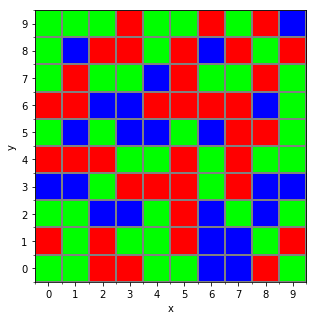

In [564]:
PlotAutomataHistory(cells_m_type)
#cells.shape

### Define a function that applies the rule

In [565]:
def apply_rule(mystate, neighstate, grid, rules, cells):
    
    #filterstate
    #offspring..
    neighcoord=filteringstate(mystate, neighstate, rules)
    
    if mystate==0:
        return 0, update_grid(cells)
    
    if mystate==1:
            number=np.random.randint(0,1000)%len(neighstate)
            value_eat=get_value_eat(grid, neighcoords)
            return neighcoords[number], value_eat
        

### Define Neighborhood

In [566]:
#Takes an idx out of all_idx (shuffled) 
    #calculates the coordinates of a cell based on the idx
    #calculates it's neighborhood periodic boundaries 
    #creates neighstate, [state, row coordinate, column coordinates]
    #returns mycoords, mystate, neighstate 

In [567]:
def idxToCoordinates(idx,x_dim):
    return [idx%x_dim,idx//x_dim]

def getNeighbourhood(idx, x_dim, y_dim):
    neighb = []
    coords = idxToCoordinates(idx, x_dim)
    for j in range(-1, 2, 1):
        for i in range(-1, 2, 1):
            # Handle boundary conditions
            neighb.append([(coords[0] + i)%(x_dim), (coords[1] + j)%(y_dim)])
    #print (coords, neighb)
    return (coords, neighb)

def getNeighbourhoodValues(idx, grid, x_dim, y_dim):
    mycoords,neighCoords=getNeighbourhood(idx, x_dim, y_dim)
    
    mystate=grid[mycoords[0]][mycoords[1]].type_cell
    neighstate=[]
    
    for neighc in neighCoords:
      
        
        #Problem recursion of own coordinates (TO DO) #fid
        if (neighc[0] != mycoords[0] or neighc[1] != mycoords[1]):
          
            neighstate.append([grid[neighc[0]][neighc[1]].type_cell, neighc[0], neighc[1]])
        
    #print("- Coords ",mycoords," = ",mystate," neigs ",neighstate," = ",neighCoords)
    print(mycoords,neighstate)
    return mycoords,mystate,neighstate

                                                                         

In [568]:
#filter neighstate only the important states out 

In [569]:
def filteringstate(mystate, neighstate, rules): #rule [mystate, states allowed to interact]
    filter_states=rules[mystate]
    filtered_neighstate=[]
    value_eat=0
    
    for possible in filter_states:
        for neigh in neighstate:
            if possible == neigh[0]:
                filtered_neighstate.append([neigh[1],neigh[2]])
    return filtered_neighstate
            
    
    
    

### Define the step Function


In [570]:
#input: state (2D Matrix)
# all_idx is used for the iteration through the grid, (random)

#input is the current state (map with only the cell type information )


In [576]:
def step(state,rules, cells):
    """Every timestep the state of the new generation of cells is determined by 
    the previous generation neighborhood
    Input: current state of all cells (state)
    Output: next state of all cells (new_state) 
    """
    
    all_idx = np.arange(0, r_dim*c_dim, 1)
    
    shuffle(all_idx)
    
    #Iterate through all cells (C) in the automata and extract its neighbourhood
    for idx in all_idx:
        #print("cell ",mycoords)
        mycoords,mystate,neighstate = getNeighbourhoodValues(idx,state,x_dim,y_dim)
        #print("cell ",idx," - ",mycoords)

        neighcoord, value_eat=apply_rule(mystate,mycoords, neighstate, state, rules, cells)
        #def set_movement(self, cells, coords_1, coords_2, increase_value_lifespan, increase_value_eat):
        cells[mycoord[0]][mycoord[1]].set_movement(cells,mycoords,neighcoord,1,value_eat)
        
    return state

### Define the simulation

In [577]:
#uses step max_step times and 
#step needs to only output 

In [578]:
def simulation(X,max_steps):
    """Traces the whole evolution of an initial state X through max_steps generations
    Input: X, initial state
    Output: cells_stack.transpose(), matrix stacking the cells state after each timestep 
    """
  
    rules= [[],[0],[1,0]]
    
    print(rules)
    print(rules[1])
    cells_stack=[X]
    new_state=X
    #            #print(coords[0]+i," - ",coords[1]+j)Move one step forward max_step times
    for i in range(max_steps):
        #Moves one step forward
        new_state=step(new_state,rules,X)
        #Stores the result
        cells_stack.append(new_state)
    return cells_stack
    

# Performing the simulation
___

In [579]:
max_steps=30 #Number of timesteps
results=simulation(cells,max_steps) #Perform simulation and store its results

[[], [0], [1, 0]]
[0]
[6, 7] [[2, 5, 6], [0, 6, 6], [1, 7, 6], [0, 5, 7], [1, 7, 7], [0, 5, 8], [2, 6, 8], [0, 7, 8]]


ValueError: not enough values to unpack (expected 3, got 2)

## Plot results

In [580]:
PlotAutomataHistory(results[-1])

NameError: name 'results' is not defined

In [581]:
### Visualize Results

import matplotlib.animation
plt.rcParams["animation.html"] = "jshtml" #style of the plot 
from copy import deepcopy #for creating a compunt object and copying existing objects into it 
import pandas as pd



In [479]:
%%capture
# Build plot
fig, ax = plt.subplots(figsize=(6,4))
resultsCopy= deepcopy(results)

def animate(j):
    ax.clear()
    PlotAutomataHistory(results[j],ax=ax)
    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(results))

NameError: name 'results' is not defined

In [480]:
ani

NameError: name 'ani' is not defined

In [481]:
stacked=[result.flatten() for result in results]

NameError: name 'results' is not defined

In [482]:
df = pd.DataFrame(stacked)

NameError: name 'stacked' is not defined

In [483]:
S = df[df==0].count(axis='columns')
I = df[df==1].count(axis='columns')
R = df[df==2].count(axis='columns')
W = df[df==3].count(axis='columns')

NameError: name 'df' is not defined

In [484]:
x = np.arange(0.0, max_steps+1, 1)

In [485]:
plt.plot(x,S,'red', label='S')
plt.plot(x,I,'green', label='I')
plt.plot(x,R,'blue', label='R')
plt.plot(x,W,'yellow',label='W')
plt.xlabel('Timstep')
plt.ylabel('Count')
plt.title('Simulation results')
plt.show()

NameError: name 'S' is not defined